In [47]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
import numpy as np
import matplotlib.pyplot as plt

with np.load('/home/suresh/SoSe2021/Deep-Learning/sose21/Assignments/Assignment4/prediction-challenge-02-data.npz') as fh:
    x_train = fh['x_train']
    y_train = fh['y_train']
    x_test = fh['x_test']
    

In [49]:
# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2/3. INDEX: PIXEL VALUE (32 x 32)
# 4. INDEX: COLOR CHANNELS (3)
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)

# TEST DATA: INPUT (x) ONLY
print(x_test.shape, x_test.dtype)

(3000, 32, 32, 3) float32
(3000,) float64
(300, 32, 32, 3) float32


In [50]:
X_train = x_train/ 255 
X_val = x_test / 255 

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.30,random_state=42)

In [52]:
cifar10_model=tf.keras.models.Sequential()

# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [53]:
cifar10_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [54]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [55]:
history = cifar10_model.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
66/66 [==============================] - 5s 63ms/step - loss: 1.1785 - sparse_categorical_accuracy: 0.3605 - val_loss: 1.0730 - val_sparse_categorical_accuracy: 0.4189
Epoch 2/10
66/66 [==============================] - 4s 61ms/step - loss: 1.0279 - sparse_categorical_accuracy: 0.4652 - val_loss: 0.9693 - val_sparse_categorical_accuracy: 0.5333
Epoch 3/10
66/66 [==============================] - 4s 61ms/step - loss: 0.9293 - sparse_categorical_accuracy: 0.5548 - val_loss: 0.9291 - val_sparse_categorical_accuracy: 0.5478
Epoch 4/10
66/66 [==============================] - 4s 61ms/step - loss: 0.8536 - sparse_categorical_accuracy: 0.6029 - val_loss: 0.8456 - val_sparse_categorical_accuracy: 0.5844
Epoch 5/10
66/66 [==============================] - 4s 63ms/step - loss: 0.8102 - sparse_categorical_accuracy: 0.6281 - val_loss: 0.8434 - val_sparse_categorical_accuracy: 0.5933
Epoch 6/10
66/66 [==============================] - 4s 62ms/step - loss: 0.7573 - sparse_categorical_accu

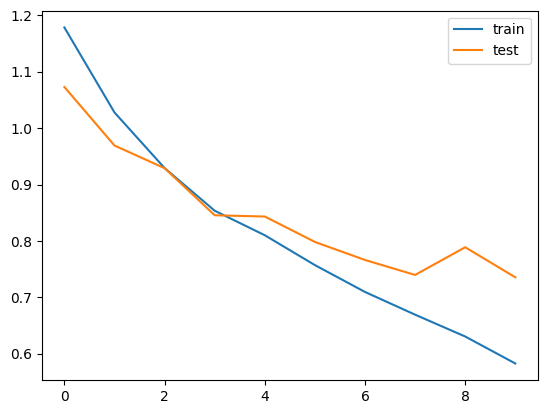

In [56]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [57]:
test_loss, test_accuracy = cifar10_model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 10ms/step - loss: 0.7356 - sparse_categorical_accuracy: 0.6667


In [58]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.6666666865348816


In [59]:
y_pred = cifar10_model.predict(X_test)


In [60]:
predictionmodel1 = [np.argmax(element) for element in y_pred]

In [61]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, predictionmodel1))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.64      0.51      0.57       319
         1.0       0.59      0.68      0.63       295
         2.0       0.78      0.83      0.80       286

    accuracy                           0.67       900
   macro avg       0.67      0.67      0.67       900
weighted avg       0.67      0.67      0.66       900



In [62]:
y_pred2 = cifar10_model.predict(X_val)

In [63]:
predictionmodel2 = [np.argmax(element) for element in y_pred2]

In [64]:
prediction = np.array(predictionmodel2)

In [65]:
prediction.shape[0]

300

In [66]:
assert prediction.ndim == 1
assert prediction.shape[0] == 300

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('prediction.npy', prediction.astype(int))

In [67]:
def validate_prediction_format():
    loaded = np.load('prediction.npy')
    assert loaded.shape == (300, )
    assert loaded.dtype == int
    assert (loaded <= 2).all()
    assert (loaded >= 0).all()
validate_prediction_format()